In [1]:
from datetime import datetime
print(datetime.now().strftime('This code ran on %Y-%m-%d %H:%M:%S \n'))

!python3 --version
print()

#!ls -al
!nvidia-smi

This code ran on 2024-11-22 23:22:12 

Python 3.11.9

Fri Nov 22 23:22:12 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.14              Driver Version: 550.54.14      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100 80GB PCIe          Off |   00000000:02:00.0 Off |                    0 |
| N/A   73C    P0            133W /  300W |   24219MiB /  81920MiB |     94%      Default |
|                                         |                        |             Disab

In [ ]:
%cd ~/git-repos/Visual-Data-Mining-AI-Model/training 

#works 11B
#!torchrun --nnodes 1 --nproc_per_node 4  finetuning.py --enable_fsdp --lr 1e-5  --num_epochs 3 --batch_size_training 8 --model_name meta-llama/Llama-3.2-11B-Vision-Instruct --dist_checkpoint_root_folder ./finetuned_model --dist_checkpoint_folder fine-tuned  --use_fast_kernels --dataset "custom_dataset" --custom_dataset.test_split "test" --custom_dataset.file "web_scraper_dataset.py"  --run_validation True --batching_strategy padding  --use_peft --peft_method lora

#testing 90B
from huggingface_hub import snapshot_download

snapshot_download(
    repo_id="meta-llama/Llama-3.2-90B-Vision-Instruct",
    #token="your_huggingface_token"
)
#!torchrun --nnodes 1 --nproc_per_node 4  finetuning.py --enable_fsdp --lr 1e-5  --num_epochs 1 --batch_size_training 8 --model_name meta-llama/Llama-3.2-90B-Vision-Instruct --dist_checkpoint_root_folder ./finetuned_model --dist_checkpoint_folder fine-tuned  --use_fast_kernels --dataset "custom_dataset" --custom_dataset.test_split "test" --custom_dataset.file "web_scraper_dataset.py"  --run_validation True --batching_strategy padding  --use_peft --peft_method lora


/Users/924284072/git-repos/Visual-Data-Mining-AI-Model/venv_visual_data_mining/lib64/python3.11/site-packages/IPython/core/magics/osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})
/Users/924284072/git-repos/Visual-Data-Mining-AI-Model/venv_visual_data_mining/lib64/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


/Users/924284072/git-repos/Visual-Data-Mining-AI-Model/training


Fetching 59 files:   0%|          | 0/59 [00:00<?, ?it/s]

model-00012-of-00037.safetensors:   9%|8         | 409M/4.66G [00:00<?, ?B/s]

USE_POLICY.md:   0%|          | 0.00/6.02k [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/215 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/5.15k [00:00<?, ?B/s]

model-00013-of-00037.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00015-of-00037.safetensors:   0%|          | 0.00/4.66G [00:00<?, ?B/s]

.gitattributes:   0%|          | 0.00/1.52k [00:00<?, ?B/s]

model-00016-of-00037.safetensors:   0%|          | 0.00/4.66G [00:00<?, ?B/s]

model-00014-of-00037.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00017-of-00037.safetensors:   0%|          | 0.00/4.66G [00:00<?, ?B/s]

model-00018-of-00037.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00019-of-00037.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00020-of-00037.safetensors:   0%|          | 0.00/4.66G [00:00<?, ?B/s]

model-00021-of-00037.safetensors:   0%|          | 0.00/4.66G [00:00<?, ?B/s]

model-00022-of-00037.safetensors:   0%|          | 0.00/4.66G [00:00<?, ?B/s]

model-00023-of-00037.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00025-of-00037.safetensors:   0%|          | 0.00/4.66G [00:00<?, ?B/s]

model-00024-of-00037.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00026-of-00037.safetensors:   0%|          | 0.00/4.66G [00:00<?, ?B/s]

model-00027-of-00037.safetensors:   0%|          | 0.00/4.66G [00:00<?, ?B/s]

model-00028-of-00037.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00029-of-00037.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00030-of-00037.safetensors:   0%|          | 0.00/4.66G [00:00<?, ?B/s]

model-00031-of-00037.safetensors:   0%|          | 0.00/4.66G [00:00<?, ?B/s]

model-00033-of-00037.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00034-of-00037.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00032-of-00037.safetensors:   0%|          | 0.00/4.66G [00:00<?, ?B/s]

model-00035-of-00037.safetensors:   0%|          | 0.00/4.66G [00:00<?, ?B/s]

model-00036-of-00037.safetensors:   0%|          | 0.00/4.66G [00:00<?, ?B/s]

model-00037-of-00037.safetensors:   0%|          | 0.00/4.88G [00:00<?, ?B/s]

consolidated.00.pth:   0%|          | 0.00/22.2G [00:00<?, ?B/s]

consolidated.01.pth:   0%|          | 0.00/22.2G [00:00<?, ?B/s]

consolidated.02.pth:   0%|          | 0.00/22.2G [00:00<?, ?B/s]

consolidated.03.pth:   0%|          | 0.00/22.2G [00:00<?, ?B/s]

consolidated.04.pth:   0%|          | 0.00/22.2G [00:00<?, ?B/s]

consolidated.05.pth:   0%|          | 0.00/22.2G [00:00<?, ?B/s]

consolidated.06.pth:   0%|          | 0.00/22.2G [00:00<?, ?B/s]

consolidated.07.pth:   0%|          | 0.00/22.2G [00:00<?, ?B/s]

In [6]:
#display the format of the dataset

from datasets import load_dataset
from huggingface_hub import HfApi

# Load the original dataset
my_dataset = load_dataset("jwaters8978/web_scraper_dataset")
reference_dataset = load_dataset("HuggingFaceM4/the_cauldron", name="ocrvqa")

print(my_dataset)
print(reference_dataset)
print()

print(my_dataset.column_names)
print(reference_dataset.column_names)
print()

import pprint
pp = pprint.PrettyPrinter(indent=2)
print("My dataset first sample:")
pp.pprint(my_dataset['train'][0])
print("\nReference dataset first sample:")
pp.pprint(reference_dataset['train'][0])
print()

print(my_dataset['train'][0]['images'])
print(reference_dataset['train'][0]['images'])

print(type(my_dataset['train'][0]['images']))
print(type(reference_dataset['train'][0]['images']))


DatasetDict({
    train: Dataset({
        features: ['images', 'texts'],
        num_rows: 15937
    })
})
DatasetDict({
    train: Dataset({
        features: ['images', 'texts'],
        num_rows: 165746
    })
})

{'train': ['images', 'texts']}
{'train': ['images', 'texts']}

My dataset first sample:
{ 'images': <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1280x720 at 0x7F827C4F6D90>,
  'texts': [ { 'assistant': '[79.92, 7.64, 85.31, 10.42]',
               'source': 'web_scraper',
               'user': 'Return the bounding box of the Text link with the '
                       "words 'About Us'. It's used to navigate to the About "
                       'Us section of the website and if we click it the About '
                       'Us section will load.'}]}

Reference dataset first sample:
{ 'images': [ <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=380x500 at 0x7F827C51F850>],
  'texts': [ { 'assistant': 'David MACAULAY.',
               'source': 'ocrvqa',
 

In [7]:
#from datasets import load_dataset

#!python inference.py --model_name meta-llama/Llama-3.2-11B-Vision-Instruct --prompt_file prompt.txt --peft_model PATH/to/save/PEFT/model/ --use_auditnlg
#!wget --header="User-Agent: Mozilla/5.0" https://images.pexels.com/photos/45201/kitty-cat-kitten-pet-45201.jpeg -O kitty-cat.jpg

#my_dataset = load_dataset("jwaters8978/web_scraper_dataset")
#print(my_dataset['train'][0]['images'])
#print(my_dataset['train'][0]['texts'])

#!python multi_modal_infer.py --image_path kitty-cat.jpg --prompt_text "What is the bounding box for the kittens face?" --temperature 0.5 --top_p 0.8 --model_name "meta-llama/Llama-3.2-11B-Vision-Instruct" --peft_model_path "PATH/to/save/PEFT/model/"






The model weights are not tied. Please use the `tie_weights` method before using the `infer_auto_device` function.


Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

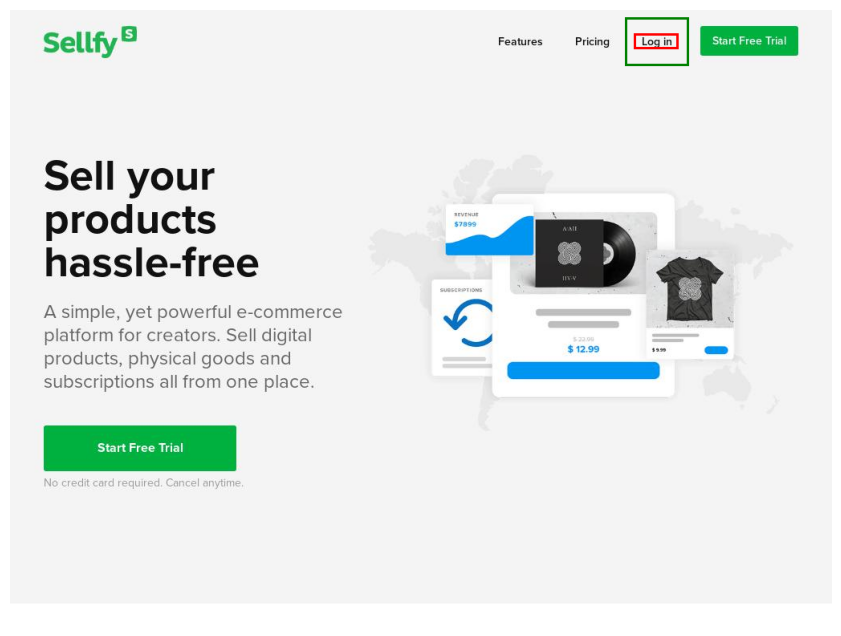

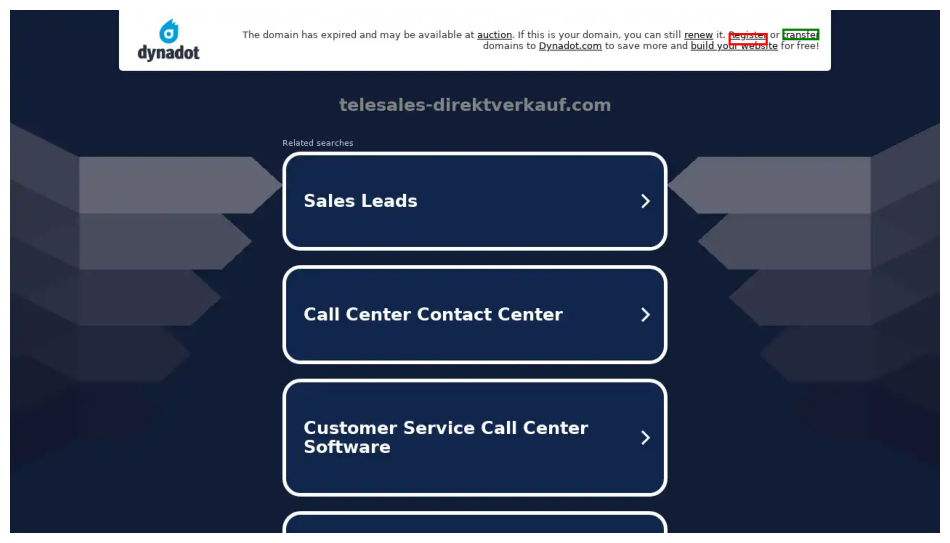

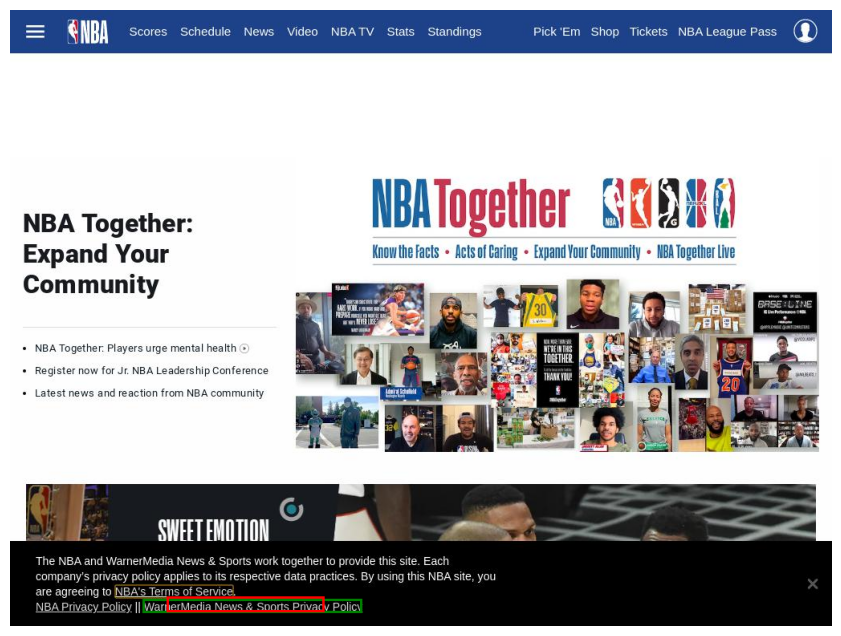

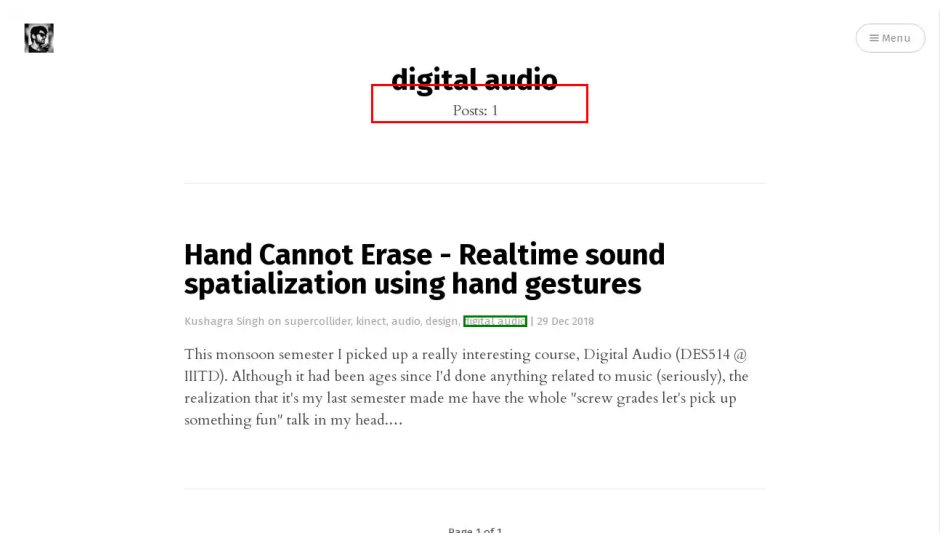

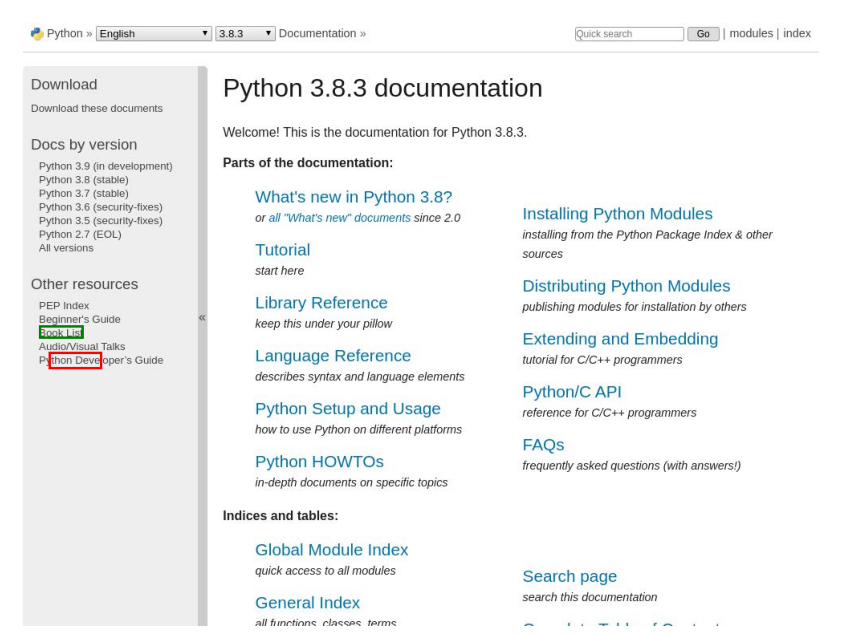

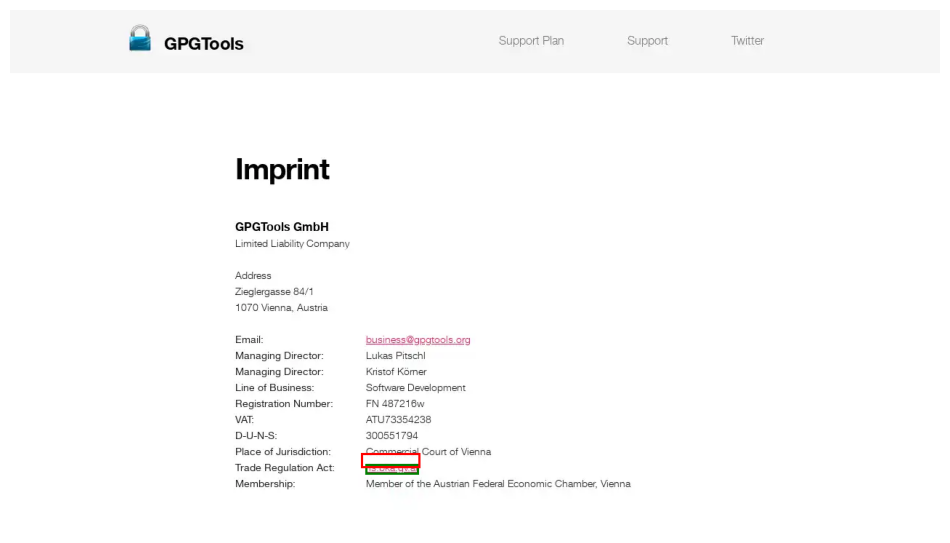

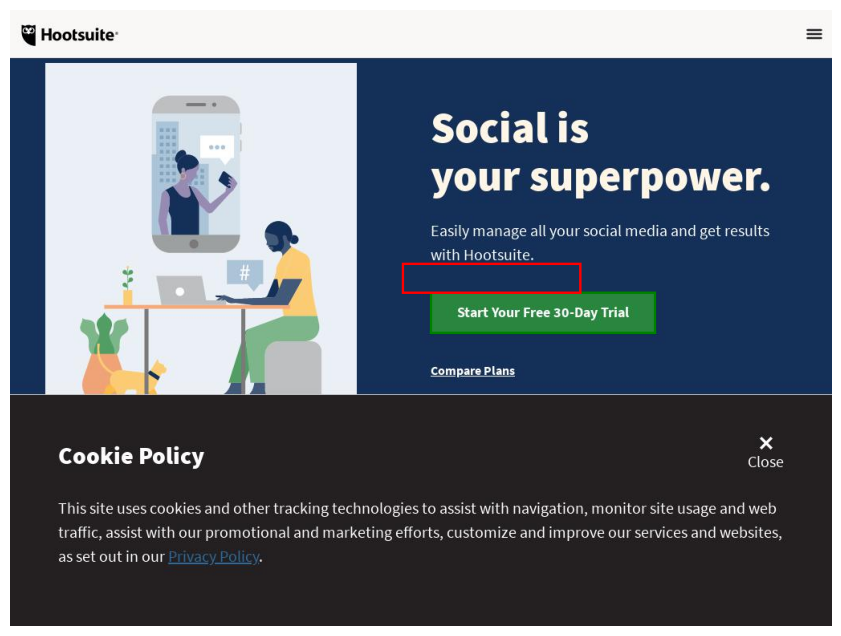

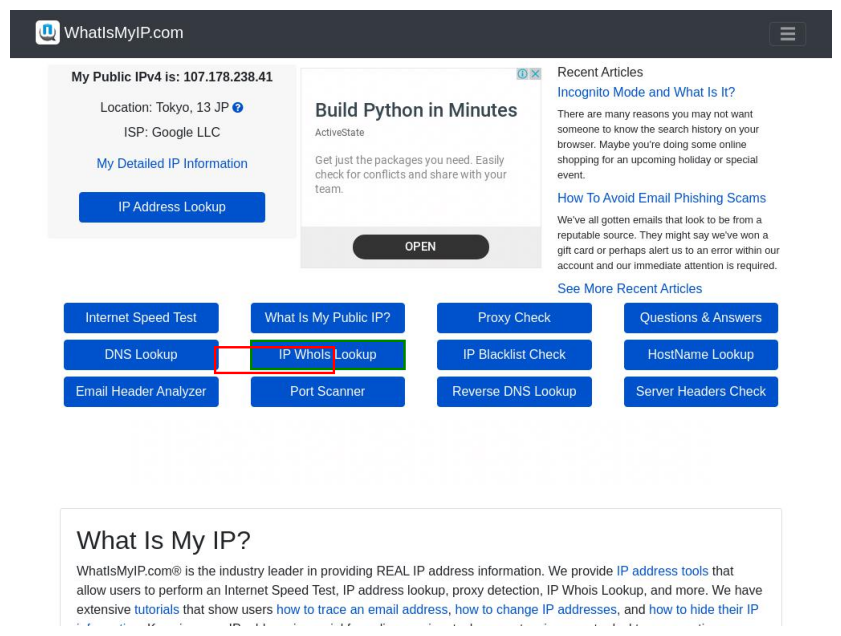

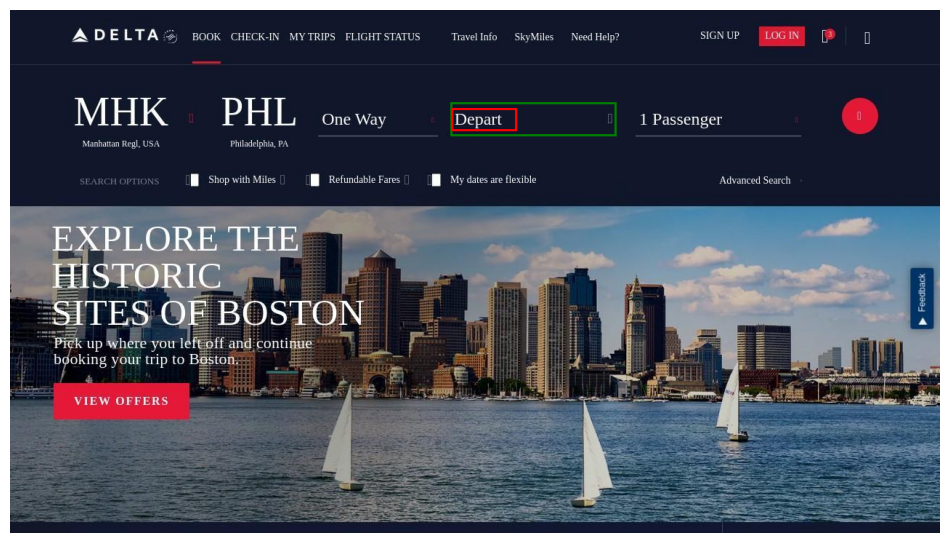

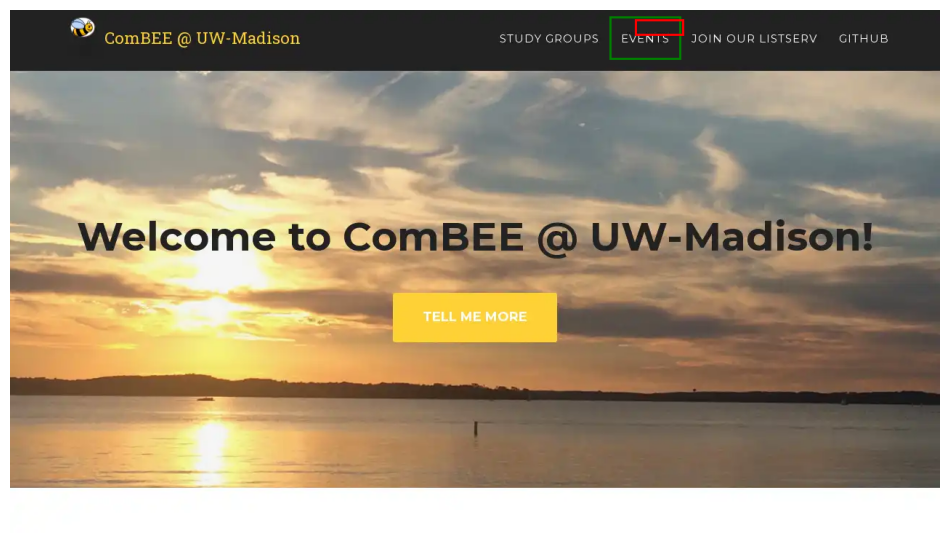

In [2]:
import torch
import gc
from contextlib import contextmanager
import tempfile
from datasets import load_dataset
import os
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
from transformers import MllamaForConditionalGeneration, MllamaProcessor

class ModelMemoryManager:
    @contextmanager
    def load_model(self, model_class, model_name, processor_class=None, peft_model_path=None, **kwargs):
        try:
            model = model_class.from_pretrained(model_name, **kwargs)
            if peft_model_path:
                from peft import PeftModel
                model = PeftModel.from_pretrained(model, peft_model_path)
            processor = processor_class.from_pretrained(model_name) if processor_class else None
            yield model, processor
        finally:
            del model
            if processor:
                del processor
            torch.cuda.empty_cache()
            gc.collect()

def convert_to_pixels(bbox, image_size):
    x_res, y_res = image_size
    return [
        bbox[0] * x_res / 100,
        bbox[1] * y_res / 100,
        bbox[2] * x_res / 100,
        bbox[3] * y_res / 100
    ]

def process_batch(model, processor, dataset, start_index, batch_size):
    for i in range(batch_size):
        index = start_index + i
        image = dataset['train'][index]['images']
        draw = ImageDraw.Draw(image)
        
        with tempfile.NamedTemporaryFile(suffix='.png', delete=False) as tmp:
            image.save(tmp.name)
            prompt = dataset['train'][index]['texts'][0]['user']
            
            # Process image and generate text
            img_for_model = Image.open(tmp.name).convert("RGB")
            conversation = [
                {
                    "role": "user",
                    "content": [{"type": "image"}, {"type": "text", "text": prompt}],
                }
            ]
            prompt_text = processor.apply_chat_template(
                conversation, add_generation_prompt=True, tokenize=False
            )
            inputs = processor(img_for_model, prompt_text, return_tensors="pt").to(model.device)
            output = model.generate(
                **inputs,
                temperature=0.5,
                top_p=0.8,
                max_new_tokens=512,
            )
            pred = processor.decode(output[0])[len(prompt_text):]
            os.remove(tmp.name)
        
        # Process boxes after model inference
        true_box = [float(x) for x in dataset['train'][index]['texts'][0]['assistant'].strip('[]').split(',')]
        true_box_pixels = convert_to_pixels(true_box, image.size)
        
        try:
            pred_numbers = pred.split('|>')[1].split('<|')[0].strip()
            pred_box = [float(x) for x in pred_numbers.strip('[]').split(',')]
            pred_box_pixels = convert_to_pixels(pred_box, image.size)
            
            draw.rectangle(true_box_pixels, outline='green', width=3)
            draw.rectangle(pred_box_pixels, outline='red', width=3)
        except Exception as e:
            print(f"Error parsing prediction at index {index}: {e}")
            print(f"Raw prediction: {pred}")
        
        plt.figure(figsize=(12,8))
        plt.imshow(image)
        plt.axis('off')
        plt.show()
        plt.close()

# Main execution
my_dataset = load_dataset("jwaters8978/web_scraper_dataset")
manager = ModelMemoryManager()

with manager.load_model(
    MllamaForConditionalGeneration,
    "meta-llama/Llama-3.2-11B-Vision-Instruct",
    MllamaProcessor,
    peft_model_path="PATH/to/save/PEFT/model/",
    torch_dtype=torch.bfloat16,
    device_map="auto",
    use_safetensors=True
) as (model, processor):
    # Process images in batches
    process_batch(model, processor, my_dataset, start_index=15903, batch_size=10)